<a href="https://colab.research.google.com/github/palarunava/machine-learning-courses/blob/main/machine-learning-specialization/supervised-ml-regression-classification/C1_W2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get the data**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.


In [3]:
data = pd.read_csv(path + "/Housing.csv")
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [5]:
num_samples = data.shape[0]
train_valid_test_split_ratio = [75, 20, 5] # 75:20:5 split

train_num_samples = math.floor((num_samples / 100) * train_valid_test_split_ratio[0])
valid_num_samples = math.floor((num_samples / 100) * train_valid_test_split_ratio[1])
test_num_samples = num_samples - train_num_samples - valid_num_samples

data_train = data.iloc[:train_num_samples, :]
data_valid = data.iloc[train_num_samples:(train_num_samples + valid_num_samples), :]
data_test = data.iloc[(train_num_samples + valid_num_samples):, :]

print(f"Number of training samples: {train_num_samples}")
print(f"Number of validation samples: {valid_num_samples}")
print(f"Number of testing samples: {test_num_samples}")
print(f"Number of features: {data_train.shape[1] - 1}")

Number of training samples: 408
Number of validation samples: 109
Number of testing samples: 28
Number of features: 12


In [6]:
X_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
X_norm = (X_train - X_train.mean()) / X_train.std()
y_norm = (y_train - y_train.mean()) / y_train.std()

In [7]:
# Calculates y = f(x) = wx + b
def linear_regression_predict(X, w, b):
  return X.dot(w) + b

In [8]:
# Calculates cost with regularization
def linear_regression_cost(X, y, w, b, _lambda = 0):
  y_predict = linear_regression_predict(X, w, b)
  y_error = y_predict - y
  cost = ((y_error ** 2).sum() + _lambda * ((w ** 2).sum() + (b ** 2))) / (2*X.shape[0])
  return cost

In [9]:
# Calculates gradients
def linear_regression_gradients(X, y, w, b, _lambda = 0):
  y_predict = linear_regression_predict(X, w, b)
  y_error = y_predict - y
  dj_dw = (y_error.dot(X) + _lambda * w) / X.shape[0]
  dj_db = (np.sum(y_error) + _lambda * b) / X.shape[0]
  return dj_dw, dj_db

In [10]:
# Updates weights
def update_weights(w, b, dj_dw, dj_db, alpha = 0.1):
  w -= alpha * dj_dw
  b -= alpha * dj_db
  return w, b

In [11]:
def init_parameters_with_random_weights(X):
  w = np.random.random(X.shape[1])
  b = np.random.random()
  return w, b

In [12]:
def gradient_descent(X, y, iterations = 1000, alpha = 0.1, _lambda = 0, log_after_iterations = 10, log = True):
  cost_history = []
  w, b = init_parameters_with_random_weights(X)
  for iter in range(iterations):
    # Calculate cost
    cost = linear_regression_cost(X, y, w, b, _lambda = _lambda)

    # Calculate gradients
    dj_dw, dj_db = linear_regression_gradients(X, y, w, b, _lambda = _lambda)

    # Update weights
    w, b = update_weights(w, b, dj_dw, dj_db, alpha = alpha)

    # Log cost against iterations
    if(log):
      if (iter + 1) % log_after_iterations == 0:
        print(f'Interation: {iter + 1} Cost: {cost}')

    # Accumulate history
    cost_history.append(cost)

  return w, b, cost_history

In [13]:
def plot_cost_history(cost_history):
  plt.plot(cost_history)

  # Adding labels and a title
  plt.xlabel("Index")
  plt.ylabel("Value")
  plt.title("Plot of Array Values vs. Index")

  # Display the plot
  plt.show()

Interation: 100 Cost: 0.3946904466568971
Interation: 200 Cost: 0.2353019580437239
Interation: 300 Cost: 0.21411829073860925
Interation: 400 Cost: 0.2101696109097039
Interation: 500 Cost: 0.20926752394907547
Interation: 600 Cost: 0.20902954891704448
Interation: 700 Cost: 0.20895940911134694
Interation: 800 Cost: 0.20893686550051535
Interation: 900 Cost: 0.20892911970971037
Interation: 1000 Cost: 0.20892632179396983
Interation: 1100 Cost: 0.20892527374171124
Interation: 1200 Cost: 0.20892487096747037
Interation: 1300 Cost: 0.20892471341899188
Interation: 1400 Cost: 0.20892465104896935
Interation: 1500 Cost: 0.20892462615796387
Interation: 1600 Cost: 0.20892461617041946
Interation: 1700 Cost: 0.2089246121483369
Interation: 1800 Cost: 0.20892461052464492
Interation: 1900 Cost: 0.20892460986808623
Interation: 2000 Cost: 0.20892460960230044
Interation: 2100 Cost: 0.20892460949462296
Interation: 2200 Cost: 0.20892460945097655
Interation: 2300 Cost: 0.20892460943327806
Interation: 2400 Cost: 0

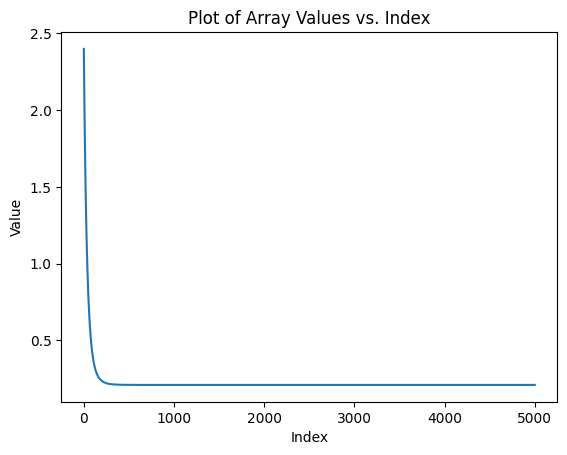

In [14]:
# Perform Gradient Descent
iterations = 5000
learning_rate = 0.01
regularization_param = 10

w, b, cost_history = gradient_descent(
    X = X_norm,
    y = y_norm,
    iterations = iterations,
    alpha = learning_rate,
    _lambda = regularization_param,
    log_after_iterations = 100,
    log = True
)
print(f'Final w: {w.to_numpy()}')
print(f'Final b: {b}')
plot_cost_history(cost_history)